In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from celluloid import Camera

In [40]:
friction = [6,1, 2, 7, 5, 9, 1, 2, 2, 3, 5, 6, 12, 10, 11, 15, 3, 2, 6 ]

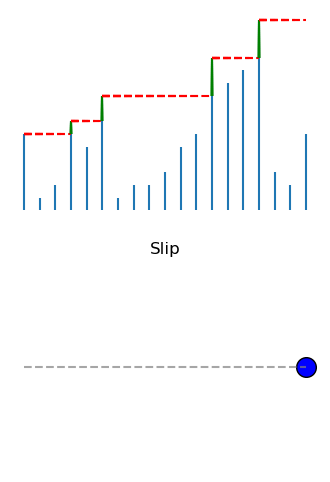

In [72]:
fig, (ax, ax2) = plt.subplots(nrows=2, figsize=(4, 6))
#camera = Camera(fig)
ax.axis('off')
ax2.axis('off')
ax2.hlines(0, 0, len(friction)-1, color='grey', alpha=0.7, ls='dashed')
for i,f in enumerate(friction):
    ax.vlines(i, 0, f)
max_indices = []
for i in range(1, len(friction)+1):
    max_indices.append(np.argmax(friction[:i]))
max_indices = np.unique(max_indices)
ball = ax2.scatter(0, 0, color='green', edgecolors='black', s=200)
for step,(m_f, m_t) in enumerate(zip(max_indices[:-1], max_indices[1:])):
    for frame,time in enumerate(np.linspace(0, 1, 10)):
        ax.hlines( friction[m_f],m_f, (m_t-m_f)*time+m_f, ls='dashed', color='red')
        ball.set_facecolor('blue')
        ball.set_offsets([(m_t-m_f)*time+m_f, 0])
        ax2.set_title("Slip")
        #camera.snap()
        plt.savefig("frames/step_%i_frame=%i.png"  %(step, frame))
    for frame2, time in enumerate(np.linspace(0, 1, 20)):
        ax.vlines(m_t, friction[m_f], (friction[m_t]-friction[m_f])*time + friction[m_f], color='green')
        ball.set_facecolor('yellow')
        #camera.snap()
        ax2.set_title("Stick")
        plt.savefig("frames/step_%i_frame=%i.png"  %(step, frame2+frame))

for frame,time in enumerate(np.linspace(0, 1, 10)):
    ax.hlines( friction[max_indices[-1]],m_t, (len(friction)-1 - m_t)*time + m_t, ls='dashed', color='red')
    ball.set_facecolor('blue')
    ball.set_offsets([(len(friction)-1 - m_t)*time + m_t, 0])
    ax2.set_title("Slip")
    plt.savefig("frames/step_%i_frame=%i.png"  %(step+1, frame))
#camera.snap()
#animation = camera.animate()
#animation.save('animation.mp4')